Optimization terminated successfully.
         Current function value: 325.434600
         Iterations: 31
         Function evaluations: 42
         Gradient evaluations: 42
{'a': array(0.9783735731607992), 'b': array(2.0498944676624222), 'c': array(2.919569179217903), 'd': array(4.099777590018385), 'sigma_log_': array(0.6455867487033473)}
Optimization terminated successfully.
         Current function value: 325.434600
         Iterations: 31
         Function evaluations: 42
         Gradient evaluations: 42


100%|██████████| 5000/5000 [00:41<00:00, 119.34it/s]



a:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.981            0.406            0.013            [0.184, 1.744]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.201          0.704          0.964          1.259          1.781


b:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  2.049            0.351            0.012            [1.333, 2.703]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  1.361          1.813          2.045          2.293          2.744


c:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------

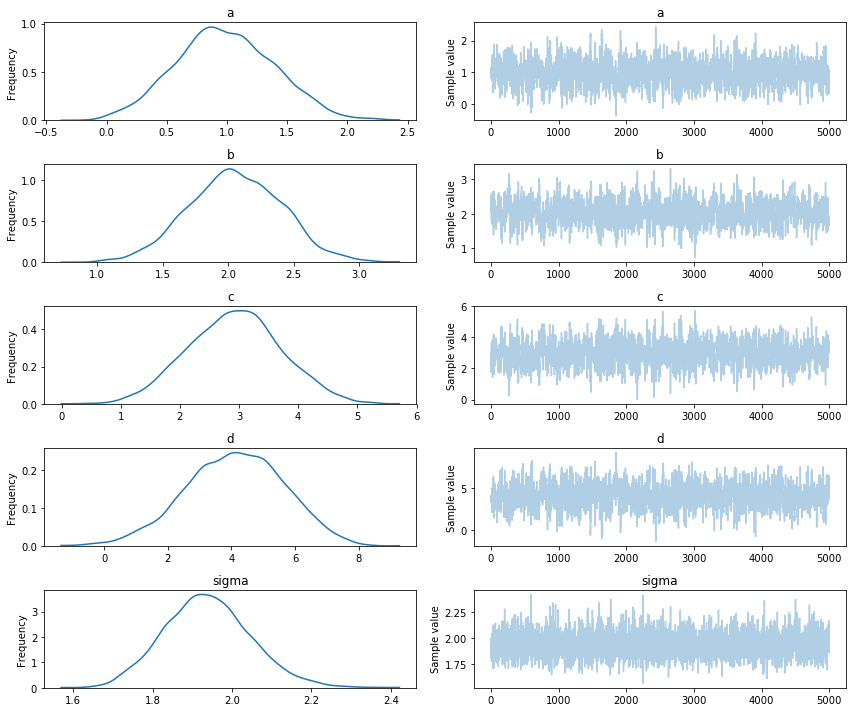

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from sklearn import datasets

# Data loading
iris = datasets.load_iris()
x=iris.data

# Extract the data
s1=x[:,0]
s2=x[:,1]
p1=x[:,2]
p2=x[:,3]

# True parameter values
a, b, c, d = 1, 2, 3, 4
sigma = 2

# Generate this number of datapoints for s2,p1,p2 given a,b,c,d,sigma
size = 150

# Simulate outcome variable (simulating random normally distributed noise from the prediction)
Y = a * s2 + b * p1 + c * p2 + d + np.random.randn(size) * sigma

# Create pyMC3 model object: container for the model random variables
reg_model = pm.Model()

# Context manager: PyMC3 objects are added to the model
with reg_model:
    
    # Stochastic random variables for the unknown model parameters: with Normal prior distributions for the regression
    # coefficients and a Half-Normal prior distribution for the sd of the observations
    a = pm.Normal('a', mu = 0, sd = 10)
    b = pm.Normal('b', mu = 0, sd = 10)
    c = pm.Normal('c', mu = 0, sd = 10)
    d = pm.Normal('d', mu = 0, sd = 10)
    sigma = pm.HalfNormal('sigma', sd = 1)
    
    # Deterministic random variable: expected value of outcome
    mu = a * s2 + b * p1 + c * p2 + d
    
    # Observed stochastic variable: likelihood (sampling distribution) of the observations
    Y_obs = pm.Normal('Y_obs', mu = mu, sd = sigma, observed = Y)

# Obtaining posterior estimates for the unknown variables in the model: MAP and MCMC

# MAP: mode of the posterior distribution (one point). Use of BFGS optimization algorithm (default)
map_estimate = pm.find_MAP(model = reg_model)

print(map_estimate)

# MCMC: gradient-based sampling methods (NUTS)
with reg_model:
    
    # Obtain starting values via MAP
    start = pm.find_MAP(model = reg_model)

    # Instantiate sampler
    step = pm.NUTS(scaling = start)

    # Draw 2000 posterior samples
    trace = pm.sample(5000, step, start = start)
    
# Posterior analysis of the sampling output

# Simple posterior plot
pm.summary(trace)
pm.traceplot(trace)


plt.show()
    